In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
! python --version

Python 3.8.0


# Data processing

In [24]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding='ISO-8859-1')
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [33]:
# df.rating = df.rating.str.replace(" star.*", "").astype(int)
# df.rating

df.rating = df.rating.replace(r'(\d+) star.*', r'\1', regex=True).astype(int)
df.rating


0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 33396, dtype: int64

In [34]:
df = df.drop(["reviewer_id", "store_name", "category", "store_address", "longitude", "review_time"], axis=1)
df

,latitude,rating_count,review,rating
0,30.460718,"1,240",Why does it look like someone spit on my food?...,1
1,30.460718,"1,240",It'd McDonalds. It is what it is as far as the...,4
2,30.460718,"1,240",Made a mobile order got to the speaker and che...,1
3,30.460718,"1,240",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,30.460718,"1,240","I repeat my order 3 times in the drive thru, a...",1
...,...,...,...,...
33391,25.810000,"2,810",They treated me very badly.,1
33392,25.810000,"2,810",The service is very good,5
33393,25.810000,"2,810",To remove hunger is enough,4
33394,25.810000,"2,810","It's good, but lately it has become very expen...",5


In [35]:
df = df.iloc[:,1:]
df

,rating_count,review,rating
0,"1,240",Why does it look like someone spit on my food?...,1
1,"1,240",It'd McDonalds. It is what it is as far as the...,4
2,"1,240",Made a mobile order got to the speaker and che...,1
3,"1,240",My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"1,240","I repeat my order 3 times in the drive thru, a...",1
...,...,...,...
33391,"2,810",They treated me very badly.,1
33392,"2,810",The service is very good,5
33393,"2,810",To remove hunger is enough,4
33394,"2,810","It's good, but lately it has become very expen...",5


In [36]:
mask = df['review'].str.contains(r'^[a-zA-Z0-9\s.,!?]*$', na=False, regex=True)
df_clean_review = df[mask].copy()

In [37]:
df_clean_review

,rating_count,review,rating
4,"1,240","I repeat my order 3 times in the drive thru, a...",1
8,"1,240",Went thru drive thru. Ordered. Getting home no...,1
11,"1,240",We stopped by for a quick breakfast. It was n...,2
14,"1,240",Ordered food burger wrong and left out part of...,1
17,"1,240",The boy who attended me made me wait and when ...,1
...,...,...,...
33390,"2,810",Very. Well,5
33391,"2,810",They treated me very badly.,1
33392,"2,810",The service is very good,5
33393,"2,810",To remove hunger is enough,4


In [38]:
df_clean_review.rating_count = df_clean_review.rating_count.str.replace(",", "").astype(int)
df_clean_review

,rating_count,review,rating
4,1240,"I repeat my order 3 times in the drive thru, a...",1
8,1240,Went thru drive thru. Ordered. Getting home no...,1
11,1240,We stopped by for a quick breakfast. It was n...,2
14,1240,Ordered food burger wrong and left out part of...,1
17,1240,The boy who attended me made me wait and when ...,1
...,...,...,...
33390,2810,Very. Well,5
33391,2810,They treated me very badly.,1
33392,2810,The service is very good,5
33393,2810,To remove hunger is enough,4


In [39]:
df_clean_review.describe()

,rating_count,rating
count,20557.000000,20557.000000
mean,2151.169285,3.434694
std,1663.993848,1.540742
min,263.000000,1.000000
25%,1269.000000,2.000000
50%,1670.000000,4.000000
75%,2657.000000,5.000000
max,19682.000000,5.000000


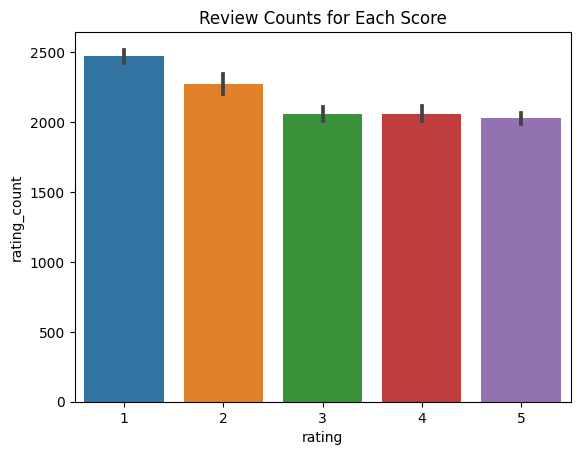

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用條形圖顯示每個評分的評論數量
sns.barplot(x='rating', y='rating_count', data=df_clean_review)
plt.title('Review Counts for Each Score')
plt.show()


In [41]:
correlation = df_clean_review['rating_count'].corr(df_clean_review['rating'])
print(f"The correlation between review counts and review score is: {correlation:.2f}")

The correlation between review counts and review score is: -0.10


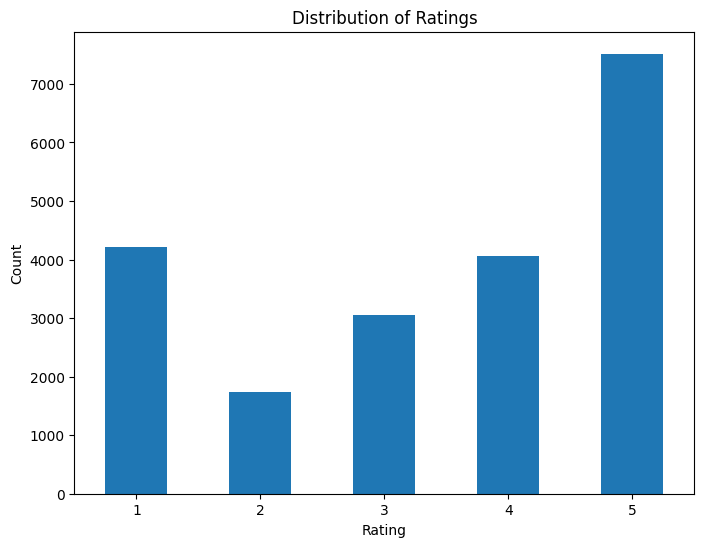

In [67]:
plt.figure(figsize=(8, 6))
df_clean_review['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [42]:
df_clean_review = df_clean_review.iloc[:, 1:]
df_clean_review

,review,rating
4,"I repeat my order 3 times in the drive thru, a...",1
8,Went thru drive thru. Ordered. Getting home no...,1
11,We stopped by for a quick breakfast. It was n...,2
14,Ordered food burger wrong and left out part of...,1
17,The boy who attended me made me wait and when ...,1
...,...,...
33390,Very. Well,5
33391,They treated me very badly.,1
33392,The service is very good,5
33393,To remove hunger is enough,4


In [43]:
df_clean_review['review'].str.len().max()

1521

In [44]:
df_clean_review['review'].str.len().min()

1

In [48]:
import torch


torch.cuda.is_available()

True

## TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer


texts = df_clean_review['review'].values
labels = df_clean_review['rating'].values

# 使用 TF-IDF 將文本轉換為詞向量
vectorizer = TfidfVectorizer(max_features=1000)  # 只考慮最常見的 1000 個詞
X_tfidf = vectorizer.fit_transform(texts).toarray()

## Sentence Enbedding by Unervisal Sentence Encoder

In [62]:
import tensorflow as tf
import tensorflow_hub as hub

# 載入 Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# 定義句子
sentences = ["Hello world!", "Machine learning is amazing."]

# 獲取句子的嵌入向量
embeddings = embed(sentences)

# 輸出嵌入向量
print(embeddings.numpy())


2023-08-27 09:04:57.117921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-27 09:04:57.138058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-27 09:04:57.138381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[[-0.02607429 -0.08460002 -0.02678663 ... -0.02173569  0.01262517
  -0.06147427]
 [ 0.02515168 -0.07437912 -0.06549311 ...  0.03154588 -0.06022625
  -0.04974781]]


In [69]:
X = embed(df_clean_review.review)
X

<tf.Tensor: shape=(20557, 512), dtype=float32, numpy=
array([[-0.03896873, -0.05757991,  0.03887402, ..., -0.02068068,
        -0.02049108, -0.05794618],
       [-0.05720881,  0.00016748,  0.06414355, ..., -0.02774875,
         0.00115145, -0.04035529],
       [-0.07209262, -0.03343599,  0.02320654, ..., -0.02309969,
         0.00021173, -0.03600383],
       ...,
       [-0.05569964, -0.06883989, -0.03038383, ..., -0.04151542,
         0.00939179, -0.01089852],
       [-0.0052366 , -0.05151204,  0.05803277, ...,  0.02712451,
         0.05742805, -0.05505144],
       [-0.06113055, -0.02793701, -0.00027733, ..., -0.01626449,
         0.00686804, -0.06218162]], dtype=float32)>

In [72]:
y = df_clean_review.rating
y

4        1
8        1
11       2
14       1
17       1
        ..
33390    5
33391    1
33392    5
33393    4
33395    5
Name: rating, Length: 20557, dtype: int64

# Data Preparation and Vetorize method comparison

In [79]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 設定 XGBoost 參數
param = {
    'booster': 'gblinear',  # 使用線性模型
    'objective': 'multi:softmax',  # 多分類問題
    'num_class': 6,  # 類別數量，假設為 1 到 5，所以設為 6
    'eval_metric': 'mlogloss'
}

## TF-IDF

In [81]:
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16445, 1000), (4112, 1000), (16445,), (4112,))

In [82]:
# 轉換數據為 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [87]:
# 訓練模型
num_round = 100
bst = xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')])

[0]	test-mlogloss:1.10183
[1]	test-mlogloss:0.96554
[2]	test-mlogloss:0.90662
[3]	test-mlogloss:0.88139
[4]	test-mlogloss:0.87327
[5]	test-mlogloss:0.87454
[6]	test-mlogloss:0.88121
[7]	test-mlogloss:0.89111
[8]	test-mlogloss:0.90300
[9]	test-mlogloss:0.91612
[10]	test-mlogloss:0.93002
[11]	test-mlogloss:0.94443
[12]	test-mlogloss:0.95916
[13]	test-mlogloss:0.97410
[14]	test-mlogloss:0.98916
[15]	test-mlogloss:1.00429
[16]	test-mlogloss:1.01945
[17]	test-mlogloss:1.03460
[18]	test-mlogloss:1.04974
[19]	test-mlogloss:1.06484
[20]	test-mlogloss:1.07989
[21]	test-mlogloss:1.09490
[22]	test-mlogloss:1.10986
[23]	test-mlogloss:1.12477
[24]	test-mlogloss:1.13963
[25]	test-mlogloss:1.15444
[26]	test-mlogloss:1.16920
[27]	test-mlogloss:1.18373
[28]	test-mlogloss:1.19776
[29]	test-mlogloss:1.21165
[30]	test-mlogloss:1.22544
[31]	test-mlogloss:1.23921
[32]	test-mlogloss:1.25244
[33]	test-mlogloss:1.26545
[34]	test-mlogloss:1.27829
[35]	test-mlogloss:1.29093
[36]	test-mlogloss:1.30265
[37]	test-m

In [88]:
# 預測
y_pred = bst.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6661


## Universal Sentence Encoder

In [89]:
# 轉換為 NumPy 數組
X_np = X.numpy()
y_np = y.to_numpy()

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16445, 512), (4112, 512), (16445,), (4112,))

In [90]:
# 轉換數據為 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [91]:
# 訓練模型
num_round = 100
bst = xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')])

[0]	test-mlogloss:0.99076
[1]	test-mlogloss:0.89765
[2]	test-mlogloss:0.86086
[3]	test-mlogloss:0.84392
[4]	test-mlogloss:0.83534
[5]	test-mlogloss:0.83089
[6]	test-mlogloss:0.82842
[7]	test-mlogloss:0.82707
[8]	test-mlogloss:0.82634
[9]	test-mlogloss:0.82594
[10]	test-mlogloss:0.82575
[11]	test-mlogloss:0.82572
[12]	test-mlogloss:0.82577
[13]	test-mlogloss:0.82588
[14]	test-mlogloss:0.82602
[15]	test-mlogloss:0.82618
[16]	test-mlogloss:0.82639
[17]	test-mlogloss:0.82659
[18]	test-mlogloss:0.82680
[19]	test-mlogloss:0.82702
[20]	test-mlogloss:0.82726
[21]	test-mlogloss:0.82749
[22]	test-mlogloss:0.82772
[23]	test-mlogloss:0.82795
[24]	test-mlogloss:0.82820
[25]	test-mlogloss:0.82844
[26]	test-mlogloss:0.82867
[27]	test-mlogloss:0.82893
[28]	test-mlogloss:0.82918
[29]	test-mlogloss:0.82942
[30]	test-mlogloss:0.82966
[31]	test-mlogloss:0.82989
[32]	test-mlogloss:0.83013
[33]	test-mlogloss:0.83036
[34]	test-mlogloss:0.83059
[35]	test-mlogloss:0.83082
[36]	test-mlogloss:0.83104
[37]	test-m

In [92]:
# Loss 有成功降低
# 預測
y_pred = bst.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6668


## Neural Network - Sentiment Classifier

In [135]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定義模型
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 5)  # 5 classes for ratings 1-5

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [136]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16445, 512), (16445,), (4112, 512), (4112,))

In [137]:
# 1. 將numpy arrays轉換為PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # 詞向量是浮點數
y_train_tensor = torch.tensor(y_train, dtype=torch.long) - 1  # 將1-5的rating轉換為0-4
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # 詞向量是浮點數
y_test_tensor = torch.tensor(y_test, dtype=torch.long) - 1  # 將1-5的rating轉換為0-4

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)
X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([16445, 512]),
 torch.Size([16445]),
 torch.Size([4112, 512]),
 torch.Size([4112]))

In [138]:
# 2. 使用TensorDataset將X和y組合成一個數據集
dataset = TensorDataset(X_tensor, y_tensor)
# 3. 使用DataLoader來批量處理數據
batch_size = 64
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [139]:
# 4. 初始化模型、損失函數和優化器
model = SentimentClassifier(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

SentimentClassifier(
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=5, bias=True)
)

In [141]:
# 5. 訓練模型
epochs = 100
# 訓練模型
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')
print("Training complete.")


Epoch [1/100], Loss: 0.7891
Epoch [2/100], Loss: 0.7604
Epoch [3/100], Loss: 0.7342
Epoch [4/100], Loss: 0.7067
Epoch [5/100], Loss: 0.6744
Epoch [6/100], Loss: 0.6336
Epoch [7/100], Loss: 0.5886
Epoch [8/100], Loss: 0.5431
Epoch [9/100], Loss: 0.4941
Epoch [10/100], Loss: 0.4447
Epoch [11/100], Loss: 0.3939
Epoch [12/100], Loss: 0.3470
Epoch [13/100], Loss: 0.3041
Epoch [14/100], Loss: 0.2697
Epoch [15/100], Loss: 0.2353
Epoch [16/100], Loss: 0.2132
Epoch [17/100], Loss: 0.1958
Epoch [18/100], Loss: 0.1841
Epoch [19/100], Loss: 0.1703
Epoch [20/100], Loss: 0.1612
Epoch [21/100], Loss: 0.1553
Epoch [22/100], Loss: 0.1538
Epoch [23/100], Loss: 0.1462
Epoch [24/100], Loss: 0.1442
Epoch [25/100], Loss: 0.1420
Epoch [26/100], Loss: 0.1396
Epoch [27/100], Loss: 0.1347
Epoch [28/100], Loss: 0.1348
Epoch [29/100], Loss: 0.1327
Epoch [30/100], Loss: 0.1334
Epoch [31/100], Loss: 0.1391
Epoch [32/100], Loss: 0.1334
Epoch [33/100], Loss: 0.1265
Epoch [34/100], Loss: 0.1222
Epoch [35/100], Loss: 0

In [147]:
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)
    correct = (predicted_classes == y_test_tensor).sum().item()
    accuracy = correct / len(y_test)
    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.2121


In [149]:
# 儲存權重
torch.save(model.state_dict(), 'model_weights.pth')